# Asthma Prediction

> * 👟 Ready To Run!
* 📝 Requires Notebook Server Advanced License
* 📥 Requires ArcPy
* 🔍 Data Science
* 💻 Predictive Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-2">Import packages</a></span></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-2">Model building</a></span></li><ul class="toc-item"><li><span><a href="#Prepare-data-and-set-ArcPy-workspace" data-toc-modified-id="Prepare-data-and-set-ArcPy-workspace">Prepare data and set workspace</a></span></li><li><span><a href="#List-the-feature-classes" data-toc-modified-id="List-the-feature-classes">List the feature classes</a></span></li><li><span><a href="#List-the-raster-datasets" data-toc-modified-id="List-the-raster-datasets">List the raster datasets</a></span></li><li><span><a href="#Visualize-the-asthma-data" data-toc-modified-id="Visualize-the-asthma-data">Visualize the asthma data</a></span></li><li><span><a href="#Variables-influencing-hospitalization-rates" data-toc-modified-id="Variables-influencing-hospitalization-rates">Variables influencing hospitalization rates</a></span></li><li><span><a href="#Setting-environment-variables" data-toc-modified-id="Setting-environment-variables">Setting environment variables</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model">Training the model</a></span></li></ul><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-4">Model evaluation</a></span></li><li><span><a href="#Visualizing-prediction-output" data-toc-modified-id="Visualizing-prediction-output-5">Visualizing prediction output</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion">Conclusion</a></span></li></ul></div>

## Introduction

This example notebook examines childhood asthma hospitalization rates in the state of Connecticut and then builds a prediction model to use for other data. The asthma data we have is only available at the census tract level, and as is the case with much of the available public health data, some data values are missing. This notebook will show how to use the Forest-based Classification and Regression tool to use known values from hospitalization rates for census tracts and build a model to predict asthma hospitalization rates for the finer-grained census block group level.

In this tutorial we will be covering the following topics:
 * How to import desired packages
 * How to set an ArcPy workspace and build a predictive model
 * How to work with ArcPy functions to perform a predictive analysis with the model

## Import packages

First, let's import all the packages we'll need through the notebook

ArcGIS API for Python is a Python library for working with maps and geospatial data, powered by web GIS. It provides simple and efficient tools for sophisticated vector and raster analysis, geocoding, map making, routing and directions, as well as for organizing and managing a GIS with users, groups and information items. In addition to working with your own data, the library enables access to ready to use maps and curated geographic data from Esri and other authoritative sources. 

ArcPy is a Python site package that provides a useful and productive way to perform geographic data analysis, data conversion, data management, and map automation with Python. Through ArcPy, we can gain access to different tools from within the ArcGIS Desktop and ArcGIS Pro platforms along with reference documentation for each function, module, and class.

Let's import both the ArcGIS API for Python and ArcPy, and the additional Python packages we'll use throughout this notebook:

In [86]:
import sys
print(sys.executable)

C:\Users\pzkhan89\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone3\python.exe


In [87]:
import os
import shutil
import zipfile

import pandas as pd
import seaborn as sns

from arcgis.gis import GIS
import arcpy

Let's check the version of `arcpy` installed in our environment:

In [88]:
arcpy.GetInstallInfo()['Version']

'2.4'

Automatically authenticate to your WebGIS using your credentials and the `home` keyword:

In [89]:
gis = GIS()#"home", verify_cert=False)

## Model building

In this notebook, we will build a predictive model based on children's hospitalization rates from asthma for census tract data in Connecticut to then subsequently help us forecast the hospitalization rates from asthma for children in Connecticut census block groups.

With the results of this model, an organization can better allocate resources so hospitals have the staff, treatments, and educational programs necessary to effectively help families with children suffering from asthma-related complications.

To begin, we will copy our analysis data from the `samplesdata` directory into our `home` directory and unzip it. Then we will set our environment’s workspace to this file geodatabase so we can access it for our analysis. We can use the Python `os`, `shutil`,  and `zip` packages to manage the file system functions to move our data and unzip it. 

### List the feature classes

In [ ]:
arcpy.env.workspace = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb"

datasets = arcpy.ListDatasets()
datasets = [''] + datasets if datasets is not None else []

for ds in datasets:
    if ds:
        if arcpy.Describe(ds).dataType == "Feature Dataset":
            for fc in arcpy.ListFeatureClasses(feature_dataset=ds):
                path = os.path.join(arcpy.env.workspace, ds, fc)
                print(path)
    else:
        for fc in arcpy.ListFeatureClasses():
            path = os.path.join(arcpy.env.workspace, fc)
            print(path)

### List the raster datasets

In [92]:
for ds in datasets:
    if ds:
        if arcpy.Describe(ds).datatype == "RasterDataset":
            path = os.path.join(arcpy.env.workspace, ds)
            print(path)

C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\GALayerToRas1
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\RoadDensity
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\DistanceToAirToxicReleases
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\Kriging_AirQuality
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\Idw_AirQuality
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\AirQualityRaster
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\AirQualityEBK
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\DistanceToPrimarySecondaryRoads
C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb\RoadDensity_ForViz


### Visualize the asthma data

We have census tract data for the state of Connecticut to begin training our model. We used the [`Enrich`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.geoenrichment.html#enrich) tool to add a variety of attributes thought to influence childhood asthma hospitalization rates to this base census data. We added socioeconomic and behavioral variables such as median income, smoking rates, and insurance spending as well as environmental variables like road density, toxic releases, and air quality. (See [Esri Demographics](http://doc.arcgis.com/en/esri-demographics/) for detailed information on the variables avaiable to add to your data, and the [GeoEnrichment service](https://developers.arcgis.com/rest/geoenrichment/api-reference/geoenrichment-service-overview.htm) documentation to learn more on enriching your data. Also see the Analyze Patterns in Construction Permits sample notebook for an example.)

we can use the Python `pandas` package and the `spatial` property to load the census feature class into a [`Spatially Enabled DataFrame`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#geoaccessor) to get a better sense of the data and what it looks like: 

In [93]:
tract_sedf = pd.DataFrame.spatial.from_featureclass('C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/TractswithAsthma_Projected')
tract_sedf.spatial.project(spatial_reference = {'wkid': 3857})
tract_sedf.head()

,OBJECTID_1,ObjectID,STATE_FIPS,CNTY_FIPS,STCOFIPS,TRACT,FIPS,POP2010,POP10_SQMI,POP2012,...,industry_indmanu_cy_p,industry_indcons_cy_p,industry_indmin_cy_p,industry_indagri_cy_p,industry_indtran_cy_p,industry_unemprt_cy,health_x8002_x_a,households_acshhbpov_p,households_acshhapov_p,SHAPE
0,1,12847,09,001,09001,010101,09001010101,4476,351.1,4454,...,2.52,6.57,0.0,0.55,0.00,4.1,10213.60,12.02,87.98,"{""rings"": [[[-8198749.507912934, 5021805.12917..."
1,2,12848,09,001,09001,010102,09001010102,4330,330.0,4328,...,3.59,4.57,0.3,0.00,0.73,4.5,12896.88,7.19,92.81,"{""rings"": [[[-8193156.48533997, 5027165.476578..."
2,3,12849,09,001,09001,010201,09001010201,3421,775.7,3489,...,5.01,2.43,0.0,0.00,1.88,2.6,13360.91,4.44,95.56,"{""rings"": [[[-8196838.721007202, 5023675.21989..."
3,4,12850,09,001,09001,010202,09001010202,5359,1402.9,5269,...,2.10,6.83,0.0,0.00,1.40,4.3,9921.79,1.24,98.76,"{""rings"": [[[-8190039.435066799, 5020903.23340..."
4,5,12851,09,001,09001,010300,09001010300,4010,1078.0,4032,...,7.37,0.29,0.0,0.00,1.66,5.5,10646.40,2.72,97.28,"{""rings"": [[[-8197306.487002994, 5019559.45284..."


Once we have our data in a pandas data frame, we can begin to explore it by performing some initial exploratory analyses. We begin by plotting the variable 'U19Rate', which is childhood asthma hospitalization rate, to get a sense for how its values change over space across the census tracts of Connecticut. 

In [94]:
asthma_map = gis.map("Connecticut")
asthma_map

MapView(layout=Layout(height='400px', width='100%'))

In [98]:
tract_sedf.spatial.plot(asthma_map, 
                        col='U19Rate',
                        renderer_type='c', 
                        method='esriClassifyNaturalBreaks',
                        class_count = 5,
                        cmap='OrRd', 
                        alpha=0.75, 
                        line_width = 0.5) 

True

### Variables influencing hospitalization rates

As mentioned earlier, we enriched the base census tract data with variables thought to influence the hospitalization rates of children under 19 affected by asthma.  The Geoerichment service added each variable as an attribute in the original feature class data, and we can now see these values in the dataframe we created.

Let's create a list of the variables we added alongside some descriptive information about what the values of the attributes mean.

In [96]:
asthma_path = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/TractswithAsthma_Projected"

In [99]:
variables = ['healthpersonalcare_mp32001a_b_p',
             'householdincome_medhinc_cy',
             'educationalattainment_hsgrad_cy_p',
             'educationalattainment_bachdeg_cy_p',
             'industry_unemprt_cy',
             'households_acshhbpov_p',
            ]

In [100]:
asthma_desc = arcpy.Describe(asthma_path)
for field in asthma_desc.fields:
    if field.name in variables:
        print(f"{field.name:40}{field.aliasName}")

healthpersonalcare_mp32001a_b_p         Smoked cigarettes in last 12 months: Percent
householdincome_medhinc_cy              2018 Median Household Income
educationalattainment_hsgrad_cy_p       2018 Education: High School Diploma: Percent
educationalattainment_bachdeg_cy_p      2018 Education: Bachelor's Degree: Percent
industry_unemprt_cy                     2018 Unemployment Rate
households_acshhbpov_p                  ACS HHs: Inc Below Poverty Level: Percent


We can also interact with functions from other python packages to peform a cursory examination of the relationship each of these variables have to each other. Using [`seaborn`](https://seaborn.pydata.org/), we will create a scatterplot matrix of all the variables within our data frame. This provides a sense for the relationship between these different possible explanatory variables. 

After we have explored our data, we can begin to prepare for training an initial model to see how well it predicts childhood asthma hospitialization rates based on the information we have so far for it to learn from. 

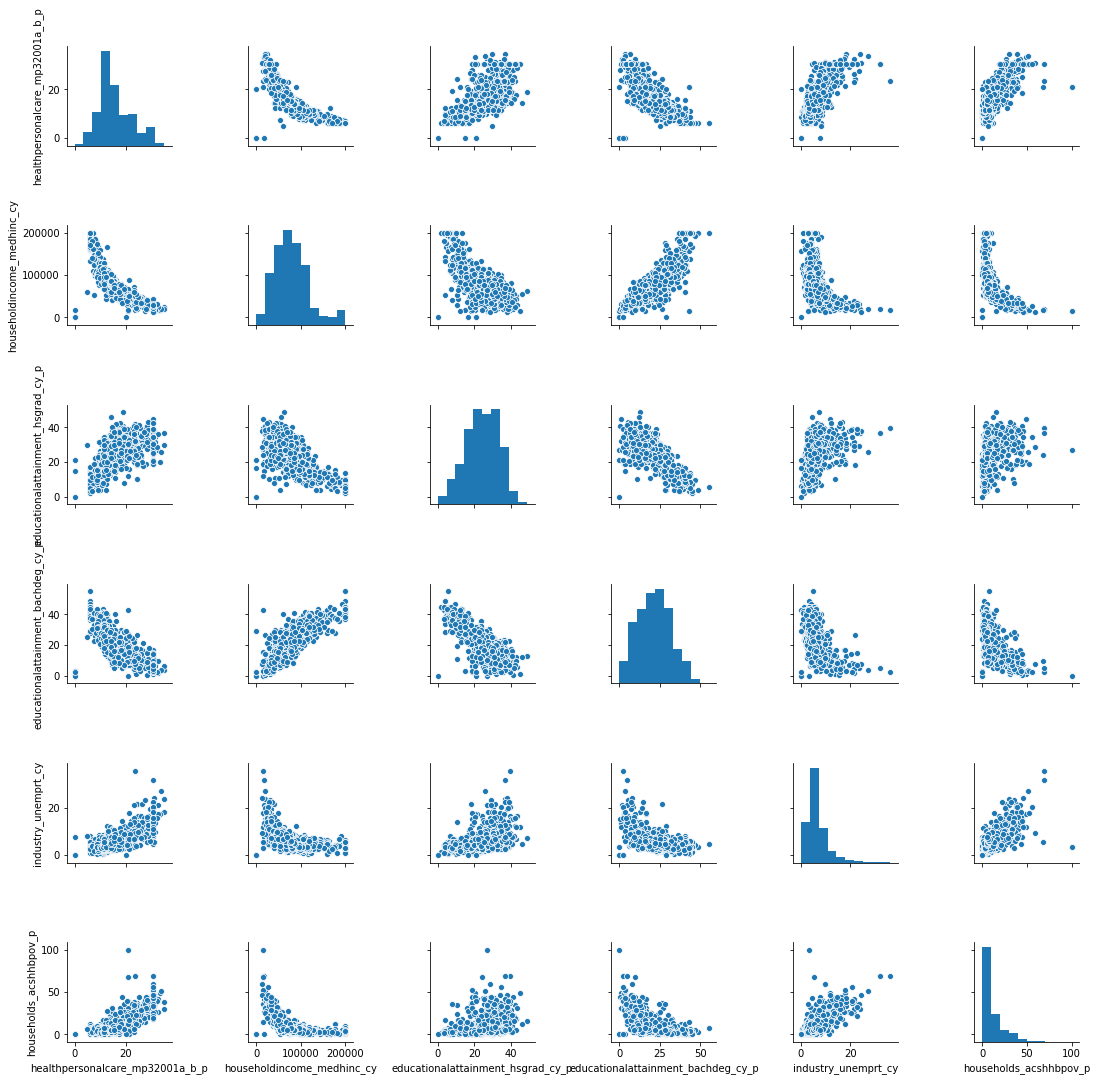

In [101]:
sns.pairplot(tract_sedf[variables])

### Setting environment variables

Before we begin training our model, we will define several environmental variables in our workspace. The tool we use these variables during its execution.

First, we opt to set a random seed so that the results from this notebook can be easily duplicated. 

Second, we elect to overwrite any output if we choose to save something with the same name as a previous run's output. 

In [102]:
arcpy.env.randomGenerator = "540977 ACM599"
arcpy.env.overwriteOutput = True

### Training the model

For our model, we will use the [Forest-based Classification and Regression tool](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/forestbasedclassificationregression.htm) which uses the random forest algorithm to build decision trees for predicting values for unknown commodities. Random forests are versatile in the types of data they can work with and powerful in predicting outcomes. We will attempt to find a good model to predict childhood asthma hospitalization rates for census block groups. 

The process of building a predictive model is iterative. It often requires multiple model runs to find the correct combination of explanatory variables and model settings that produce the best fit. The first step is to train the model for prediction. We will take advantage of the Forest-based tool's 'TRAIN' mode to try different models, settings, and options before making predictions. Training builds a forest that establishes a relationship between explanatory variables and the unknown variable we are trying to predict. The train mode allows us to save time so we don't actually run the model on unknown data until we have found a good model. 

The Forest-based tool not only contains explanatory variables from our input point or polygon feature class, but can also factor in distance features or explanatory raster layers to help increase prediction accuracy. For any input features, distance can be calculated to the nearest distance feature and used as an explanatory variable. Additionally, the tool will resample input raster layers and automatically extract values from the raster for each input feature. The tool performs this behind the scenes with just a few lines of code.

First, let's set certain variables the tool to will use. See [tool documentation](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/forestbasedclassificationregression.htm#GUID-089174E4-DE5F-4E8E-BBE9-084A52BB1508) for details:
 * Mode - train or train+predict
 * Input Features - the input dataset
 * Prediction Variable - the variable to predict
 * Categorical Variable - whether or not the variable to predict is categorical or continuous

In [103]:
prediction_type = "TRAIN"
input_fc = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/TractswithAsthma_Projected"
predict_var = "U19Rate"
categorical_var = None

Next, in order to run the Forest-based Classification and Regression tool, we need to specify explanatory variables. These could be tabular variables such as attributes of our input features...

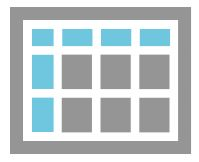</Image>

In [104]:
explanatory_var0 = "educationalattainment_bachdeg_cy_p"
explanatory_var1 = "educationalattainment_hsgrad_cy_p"
explanatory_var2 = "householdincome_medhinc_cy"
explanatory_var3 = "industry_unemprt_cy"
explanatory_var4 = "households_acshhbpov_p"
explanatory_var5 = "healthpersonalcare_mp32001a_b_p"
explanatory_vars = "{} false;{} false;{} false;{} false;{} false;{} false".format(explanatory_var0, 
                    explanatory_var1, explanatory_var2,
                    explanatory_var3, explanatory_var4,
                    explanatory_var5)

... or distance features calculating how far input features are from distance features... (we don't use any here, so let's specify "None")

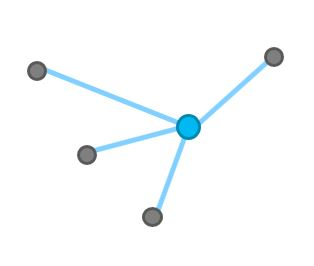

In [105]:
distance_fc = None

... or finally, explanatory rasters!

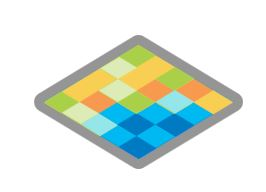

In [106]:
explanatory_rst0 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/AirQualityEBK"
explanatory_rst1 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToAirToxicReleases"
explanatory_rst2 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToPrimarySecondaryRoads"
explanatory_rst3 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/RoadDensity"
explanatory_raster = "{} false;{} false;{} false;{} false".format(explanatory_rst0, 
                      explanatory_rst1, explanatory_rst2, explanatory_rst3)

Now we've set all these variables so we can use them to train the initial model. There are a number of other parameters necessary to run the tool. Please see the reference for the [tool](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/forestbasedclassificationregression.htm#S_GUID-F98AF1AD-4466-4805-899E-52D60C9BC1E9) for detailed explanations on each. We'll set the final variables and then run the model.

In [ ]:
fc_to_predict = None
out_fc = None
out_raster = None
match_exp_var = None
match_dist_fc = None
match_exp_raster = None
out_trained_fc = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/with_spatial_added" #added by mehdi 
out_var_importance_table = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/Asthma_Train_Variable_Importance_Table"
raster_values=True
num_trees = 100
min_leaf_size = None
max_level = None
sample_size = 100
fields_to_try = None
perc_training = 10

randomforest_toolrun = arcpy.stats.Forest(prediction_type, input_fc, predict_var, 
                       categorical_var, explanatory_vars, distance_fc, explanatory_raster, 
                       fc_to_predict, out_fc, out_raster, match_exp_var, match_dist_fc, 
                       match_exp_raster, out_trained_fc, out_var_importance_table, 
                       raster_values, num_trees, min_leaf_size, max_level, sample_size, 
                       fields_to_try, perc_training)

## Model evaluation

Once we have run a training operation on the model, we can view output messages to inspect aspects of how the parameters we chose performed. These messages contain detailed diagnostic information. Not only can we see model characteristics pertaining to our forest, but also which explanatory variables were most important in influencing hospitalization rates. The tool will also automatically split your input data into training and testing data sets and perform diagnostics on both. This allows us to compare how the model performed to predict data it was previously trained on as well as additional data it had not been exposed to. This provides a comparision between actual observed values in the training data to values predicted by the model. This gives us a good idea on how our model will hold up when we try to predict for completely new features. See [here](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/how-forest-works.htm#ESRI_SECTION1_E010566C782444E2B2364442355FC50D) for details. 

In [107]:
info = randomforest_toolrun.getMessages().split('\n')[6:-2]
print(*info, sep = "\n")

-------------- Model Characteristics ---------------
Number of Trees                                  100
Leaf Size                                          5
Tree Depth Range                               14-23
Mean Tree Depth                                   17
% of Training Available per Tree                 100
Number of Randomly Sampled Variables               3
% of Training Data Excluded for Validation        10

-------------- Model Out of Bag Errors --------------
Number of Trees                      50            100
MSE                            4427.871       4375.324
% of variation explained         68.638         69.010

----------------------------- Top Variable Importance -----------------------------
Variable                                                  Importance               %
2018 Median Household Income                              1970471.93              27
ACS HHs: Inc Below Poverty Level: Percent                 1600851.54              22
Smoked cigarette

Overall, our model looks promising! Our R-squared value for our testing data set was 0.876. This means that about 88% of our response variable's variation was explained by the explanatory variables we selected in our model. 

If we are happy with this result, we can switch the tool's mode from 'TRAIN' to 'PREDICT FEATURES' to see how the model performs on the new data we wish to predict to. 

While initially we only had data at the census tract level, if we wish to predict to a finer scale, we can supply the tool with prediction locations at the block group level. As long as the data we wish to predict to is enriched with the same attribute values, our model can be applied and predictions can be given to each location.  The explanatory variables (and distance features and explanatory rasters) must match between the trianing data set and the predicting data set. For our example, we matched the explanatory variables (as attribute fields) we used from our census tract data for Connecticut to the corresponding explanatory variables in our block group data set, providing attribute field names as well as descriptions to match to so the tool knows which columns are the same even if names or path locations have changed. We did the same for the explanatory rasters we used to train the model, providing the full path to the same rasters. 

In [109]:

'''

TODO:

NEEDS TO BE MODIFED TO MATCH THE VARIABLES USED IN TRAINING

'''


prediction_type = "PREDICT_FEATURES"
input_fc = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/TractswithAsthma_Projected"
predict_var = "U19Rate"
categorical_var = None
explanatory_var0 = "educationalattainment_bachdeg_cy_p"
explanatory_var1 = "educationalattainment_hsgrad_cy_p"
explanatory_var2 = "householdincome_medhinc_cy"
explanatory_var3 = "householdincome_pci_cy"
explanatory_var4 = "industry_unemprt_cy"
explanatory_var5 = "households_acshhbpov_p"
explanatory_var6 = "households_acshhapov_p"
explanatory_var7 = "health_x8002_x_a"
explanatory_var8 = "healthpersonalcare_mp32001a_b_p"
explanatory_vars = "{} false;{} false;{} false;{} false;{} false;{} false;{} false;{} false;{} false".format(explanatory_var0, explanatory_var1, 
                   explanatory_var2, explanatory_var3, explanatory_var4, 
                   explanatory_var5, explanatory_var6, explanatory_var7, explanatory_var8)
distance_fc = None
explanatory_rst0 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/AirQualityEBK"
explanatory_rst1 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToAirToxicReleases"
explanatory_rst2 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToPrimarySecondaryRoads"
explanatory_rst3 = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/RoadDensity"
explanatory_raster = "{} false;{} false;{} false;{} false".format(explanatory_rst0, 
                              explanatory_rst1, explanatory_rst2, explanatory_rst3)
fc_to_predict = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/ConnecticutBGs_WithAsthma_Enriched"
out_fc = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/Asthma_Predictions_Block_Groups"
out_raster = None
match_exp_var0A = 'educationalattainment_bachdeg_cy_p'
match_exp_var0B = '\"2018 Education: Bachelor\'s Degree: Percent\"'
match_exp_var1A = 'educationalattainment_hsgrad_cy_p'
match_exp_var1B = '\'2018 Education: High School Diploma: Percent\''
match_exp_var2A = 'householdincome_medhinc_cy'
match_exp_var2B = '\'2018 Median Household Income\''
match_exp_var3A = 'householdincome_pci_cy'
match_exp_var3B = '\'2018 Per Capita Income\''
match_exp_var4A = 'industry_unemprt_cy'
match_exp_var4B = '\'2018 Unemployment Rate\''
match_exp_var5A = 'households_acshhbpov_p'
match_exp_var5B = '\'ACS HHs: Inc Below Poverty Level: Percent\''
match_exp_var6A = 'households_acshhapov_p'
match_exp_var6B = '\'ACS HHs:Inc at/Above Poverty Level: Percent\''
match_exp_var7A = 'health_x8002_x_a'
match_exp_var7B = '\'Health Insurance: Average\''
match_exp_var8A = 'healthpersonalcare_mp32001a_b_p'
match_exp_var8B = '\'Smoked cigarettes in last 12 months: Percent\''
match_exp_var = "{} {};{} {};{} {};{} {};{} {};{} {};{} {};{} {};{} {}".format(match_exp_var0A, match_exp_var0B, match_exp_var1A, match_exp_var1B, 
                 match_exp_var2A, match_exp_var2B, match_exp_var3A, match_exp_var3B, 
                 match_exp_var4A, match_exp_var4B, match_exp_var5A, match_exp_var5B, 
                 match_exp_var6A, match_exp_var6B, match_exp_var7A, match_exp_var7B, 
                 match_exp_var8A, match_exp_var8B)
match_dist_fc = None
match_raster0A = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/AirQualityEBK'
match_raster0B = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/AirQualityEBK'
match_raster1A = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToAirToxicReleases'
match_raster1B = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToAirToxicReleases'
match_raster2A = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToPrimarySecondaryRoads'
match_raster2B = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/DistanceToPrimarySecondaryRoads'
match_raster3A = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/RoadDensity'
match_raster3B = 'C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/RoadDensity'
match_exp_raster = "{} {};{} {};{} {};{} {}".format(match_raster0A,match_raster0B,
                    match_raster1A,match_raster1B,match_raster2A,match_raster2B,
                    match_raster3A,match_raster3B)
out_trained_fc = None
out_var_importance_table = "C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/Asthma_Prediction_Variable_Importance_Table2"
raster_values = True
num_trees = 100
min_leaf_size = None
max_level = None
sample_size = 100
fields_to_try = None
perc_training = 10

randomforest_predict_toolrun = arcpy.stats.Forest(prediction_type, input_fc, predict_var, 
                              categorical_var,explanatory_vars, distance_fc, explanatory_raster, 
                              fc_to_predict, out_fc, out_raster, match_exp_var,match_dist_fc, 
                              match_exp_raster, out_trained_fc, out_var_importance_table, 
                              raster_values, num_trees, min_leaf_size, max_level, sample_size, 
                              fields_to_try, perc_training)

Once again, we can inspect our output messages to see how our model performed. 

In [110]:
info = randomforest_predict_toolrun.getMessages().split('\n')[8:-2]
print(*info, sep = "\n")

-------------- Model Characteristics ---------------
Number of Trees                                  100
Leaf Size                                          5
Tree Depth Range                               15-26
Mean Tree Depth                                   18
% of Training Available per Tree                 100
Number of Randomly Sampled Variables               4
% of Training Data Excluded for Validation        10

-------------- Model Out of Bag Errors --------------
Number of Trees                      50            100
MSE                            4887.415       4651.905
% of variation explained         65.383         67.051

----------------------------- Top Variable Importance -----------------------------
Variable                                                  Importance               %
2018 Median Household Income                              1613379.89              22
ACS HHs: Inc Below Poverty Level: Percent                 1006706.88              14
Health Insurance

## Visualizing prediction output

We'll create a spatially-enabled dataframe to visualize the feature class output from the prediction run of the tool:

In [ ]:
out_sdef =pd.DataFrame.spatial.from_featureclass(out_fc)

Publish the dataframe as a feature layer to the portal.

In [ ]:
asthma_item = out_sdef.spatial.to_featurelayer(title="ct_asthma_predicted_block_group",
                                gis=gis,
                                tags=['data science', 'predictive', 'asthma'])

Visualize the results on a map. Use the Smart Mapping class breaks renderer to symbolize the features.

In [ ]:
predicted_map = gis.map("Connecticut")
predicted_map

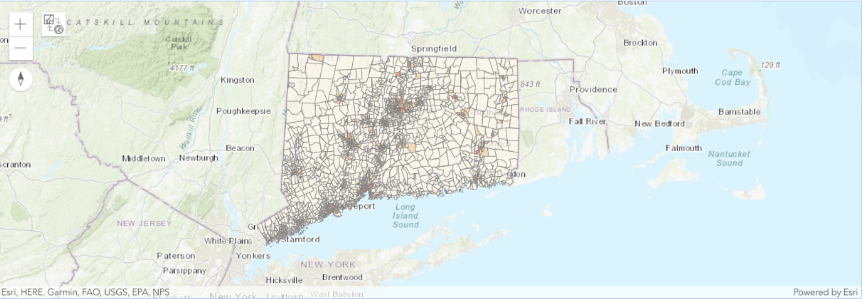</Image>

Add the item to the map, using Smart Mapping to render the feature layer with a classed breaks renderer

In [ ]:
predicted_map.add_layer(asthma_item, {"renderer":"ClassedColorRenderer",
                                    "field_name":"predicted"})

Immediately, we can see that we have filled in the holes of missing data all over Connecticut and we have produced much more detailed spatial data. Using census tract data with asthma hospitalization rates, we created a more comprehensive picture of hospitalization rates by modeling those rates to the census block group level. 

Additionally, we can create a scatterplot matrix similar to what we ran above to examine the relationships that now exist between all our explanatory variables and rasters. First we'll create a list of the explanatory variable values (from the column headings of our dataframe), then input those to the seaborn pairplot tool to create the matrix: 

In [ ]:
columns = list(out_sdef)[2:-1]
sns.pairplot(out_sdef[columns])

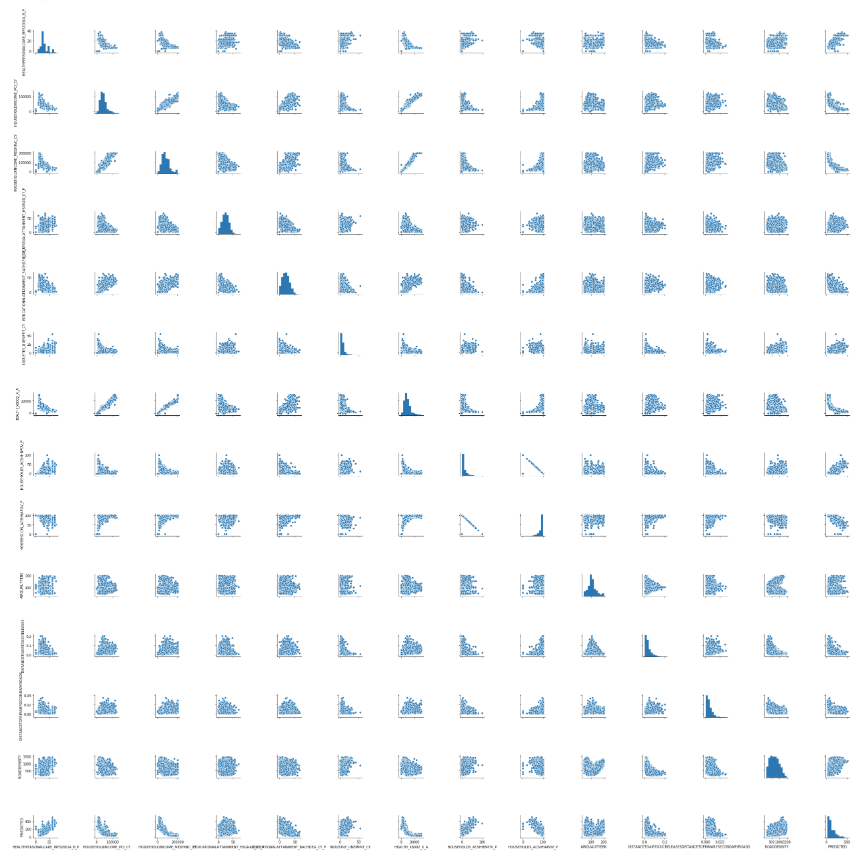</Image>

## Conclusion

In this sample notebook, we perform a machine learning analysis using ArcGIS Platform statistical tools to predict asthma hospitalization rates at the census block group level. 

We begin with state of Connecticut census tract data contaninng attributes about asthma hospitalization rates and enrich it with a set of variables thought to influence those hospitalization rates. From there, using a combination of attributes and rasters, we used the ArcPy Forest-based Classifiction and Regression tool to train a model to predict values covering the same spatial extent (state of Connecticut) but at the census block group level. 

This notebook shows a seamles fusing of machine learning power from ArcPy with the data and mapping power from the ArcGIS Python API in an easy to run and share Jupyter notebook format. 

### Added by Mehdi
##### Test with TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

In [ ]:
import matplotlib.pyplot as plt

In [111]:
with_sp_df = pd.DataFrame.spatial.from_featureclass('C:/Users/pzkhan89/Documents/MPP/TuGIS2019/Asthma_InitialAnalysis.gdb/with_spatial_added')
with_sp_df.spatial.project(spatial_reference = {'wkid': 3857})
with_sp_df.head()

,OBJECTID,SOURCE_ID,HEALTHPERSONALCARE_MP32001A_B_P,HOUSEHOLDINCOME_MEDHINC_CY,EDUCATIONALATTAINMENT_HSGRAD_CY_P,EDUCATIONALATTAINMENT_BACHDEG_CY_P,INDUSTRY_UNEMPRT_CY,HOUSEHOLDS_ACSHHBPOV_P,AIRQUALITYEBK,DISTANCETOAIRTOXICRELEASES,DISTANCETOPRIMARYSECONDARYROADS,ROADDENSITY,TRAINED_ID,U19RATE,PREDICTED,RESIDUAL,SHAPE
0,1,4,8.44,180388.0,11.34,37.53,4.3,1.24,88.127229,0.053118,0.017699,716.228164,1,62.8,52.209717,10.590283,"{""rings"": [[[-8190039.435066799, 5020903.23340..."
1,2,6,10.63,98770.0,17.70,37.86,3.3,4.68,92.425308,0.113386,0.009689,528.792784,1,79.9,68.612350,11.287650,"{""rings"": [[[-8200160.154968104, 5017883.04728..."
2,3,7,14.11,79027.0,26.02,25.20,4.7,9.01,87.610931,0.097520,0.001877,633.418429,1,151.4,121.614683,29.785317,"{""rings"": [[[-8196162.88753726, 5015599.732068..."
3,4,9,9.36,87756.0,20.90,27.98,8.7,11.38,79.975503,0.068321,0.003224,761.144293,0,94.8,87.179817,7.620183,"{""rings"": [[[-8194497.19365463, 5017791.903738..."
4,5,11,8.37,133138.0,11.81,30.22,5.6,7.19,83.567622,0.032464,0.005904,941.144821,1,55.0,56.349133,-1.349133,"{""rings"": [[[-8189596.489229324, 5021118.91578..."


In [112]:
exp_df = with_sp_df.drop(labels=['TRAINED_ID','PREDICTED','RESIDUAL','SHAPE'], axis=1)
exp_df.shape

(591, 13)

In [113]:
exp_df.head()

,OBJECTID,SOURCE_ID,HEALTHPERSONALCARE_MP32001A_B_P,HOUSEHOLDINCOME_MEDHINC_CY,EDUCATIONALATTAINMENT_HSGRAD_CY_P,EDUCATIONALATTAINMENT_BACHDEG_CY_P,INDUSTRY_UNEMPRT_CY,HOUSEHOLDS_ACSHHBPOV_P,AIRQUALITYEBK,DISTANCETOAIRTOXICRELEASES,DISTANCETOPRIMARYSECONDARYROADS,ROADDENSITY,U19RATE
0,1,4,8.44,180388.0,11.34,37.53,4.3,1.24,88.127229,0.053118,0.017699,716.228164,62.8
1,2,6,10.63,98770.0,17.70,37.86,3.3,4.68,92.425308,0.113386,0.009689,528.792784,79.9
2,3,7,14.11,79027.0,26.02,25.20,4.7,9.01,87.610931,0.097520,0.001877,633.418429,151.4
3,4,9,9.36,87756.0,20.90,27.98,8.7,11.38,79.975503,0.068321,0.003224,761.144293,94.8
4,5,11,8.37,133138.0,11.81,30.22,5.6,7.19,83.567622,0.032464,0.005904,941.144821,55.0


In [115]:
train_dataset = exp_df.sample(frac=0.8,random_state=0)
test_dataset = exp_df.drop(train_dataset.index)

In [116]:
train_stats = train_dataset.describe()
train_stats.pop("U19RATE")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
OBJECTID,473.0,301.088795,170.260993,1.000000,157.000000,307.000000,450.000000,591.000000
SOURCE_ID,473.0,443.059197,233.679423,4.000000,241.000000,472.000000,643.000000,828.000000
HEALTHPERSONALCARE_MP32001A_B_P,473.0,17.658710,6.202919,6.090000,12.670000,15.980000,21.920000,34.710000
HOUSEHOLDINCOME_MEDHINC_CY,473.0,68517.691332,29903.846627,12413.000000,46653.000000,66942.000000,84539.000000,200001.000000
EDUCATIONALATTAINMENT_HSGRAD_CY_P,473.0,27.015053,7.481517,3.420000,21.590000,27.240000,32.590000,48.910000
EDUCATIONALATTAINMENT_BACHDEG_CY_P,473.0,18.455497,8.642639,0.580000,11.780000,17.520000,24.560000,46.660000
INDUSTRY_UNEMPRT_CY,473.0,7.165116,4.388408,1.000000,4.100000,5.900000,8.700000,32.000000
HOUSEHOLDS_ACSHHBPOV_P,473.0,13.208562,11.725780,0.000000,4.990000,9.410000,17.120000,68.620000
AIRQUALITYEBK,473.0,108.017247,35.497979,43.425339,84.412092,103.398777,128.434609,198.312522
DISTANCETOAIRTOXICRELEASES,473.0,0.031603,0.025244,0.003660,0.014966,0.023506,0.038740,0.175735


In [ ]:
train_labels = train_dataset.pop('U19RATE')
test_labels = test_dataset.pop('U19RATE')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [ ]:
khanModel = build_model()

In [117]:
khanModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [118]:
khan_model_batch = normed_train_data[:10]
khan_model_result = khanModel.predict(khan_model_batch)
khan_model_result

array([[474.2647  ],
       [110.33969 ],
       [136.8519  ],
       [202.45898 ],
       [ 50.562996],
       [ 56.118366],
       [117.023895],
       [ 50.926792],
       [ 30.940441],
       [257.72073 ]], dtype=float32)

In [121]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = khanModel.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [122]:
# Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,5097.750437,54.004249,5097.750437,56.685756,4.443877,56.685756,995
996,5092.366432,54.192776,5092.366432,52.517356,4.474521,52.517356,996
997,5166.427380,54.262407,5166.427380,45.933952,4.031356,45.933952,997
998,5233.674692,54.848864,5233.674692,60.447021,4.870378,60.447021,998
999,5074.771068,53.817692,5074.771068,56.314186,4.648349,56.314186,999


In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [U19RATE]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$U19RATE^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [123]:
oss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set MSE: {:5.2f} U19RATE".format(mse))

Testing set MSE: 6904.97 U19RATE
